In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [3]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [4]:
data.shape

(3150, 5)

In [5]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
data['Length']=data['verified_reviews'].apply(len)

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [9]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
dtype: object

In [10]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


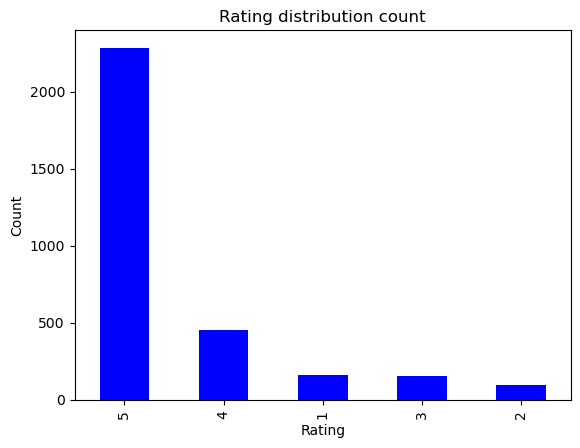

In [11]:
data['rating'].value_counts().plot.bar(color='Blue')
plt.title('Rating distribution count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [12]:
print(f"Ratings percentage : \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Ratings percentage : 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


<Axes: ylabel='Percentage wise distrubution of rating'>

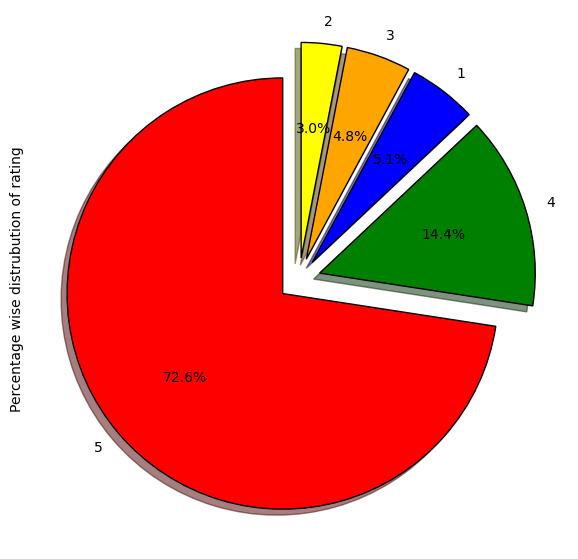

In [13]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
tags = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
wp= {'linewidth':1,'edgecolor':'black'}
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, explode=explode,wedgeprops=wp, label='Percentage wise distrubution of rating')

In [14]:
data

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382


In [15]:
print(f"Feedback value count :\n {data['feedback'].value_counts()}")

Feedback value count :
 1    2893
0     257
Name: feedback, dtype: int64


In [16]:
review_1 = data[data['feedback']==1].iloc[1]['verified_reviews']
review_1

'Loved it!'

In [17]:
review_0 = data[data['feedback']==0].iloc[1]['verified_reviews']
review_0

'Sound is terrible if u want good music too get a bose'

feedback =1 implies positive feedback where as feedback = 0  is negative feedback of the product

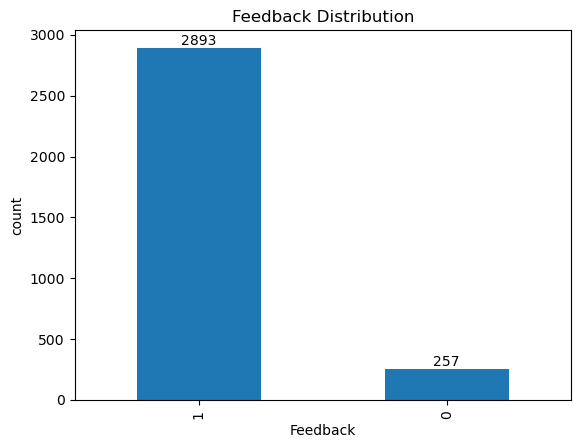

In [18]:
fig = data['feedback'].value_counts().plot(kind='bar')
plt.xlabel('Feedback')
plt.ylabel('count')
plt.title('Feedback Distribution')
for i in fig.containers:
    fig.bar_label(i)

In [19]:
print(f"percentage of feedback count: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

percentage of feedback count: 
1    91.84
0     8.16
Name: feedback, dtype: float64


<Axes: ylabel='Feedback Percentage'>

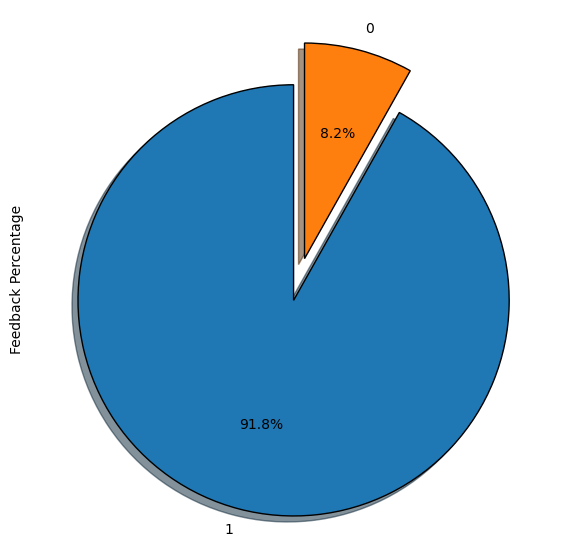

In [20]:
fig = plt.figure(figsize=(7,7))
tags=data['feedback'].value_counts()/data.shape[0]
tags.plot(kind='pie',autopct='%0.1f%%',shadow=True,explode=(0.1,0.1),startangle=90,wedgeprops={'linewidth':1,'edgecolor':'black'},label='Feedback Percentage')

In [21]:
data[data['feedback']==0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [22]:
data[data['feedback']==1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

In [23]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

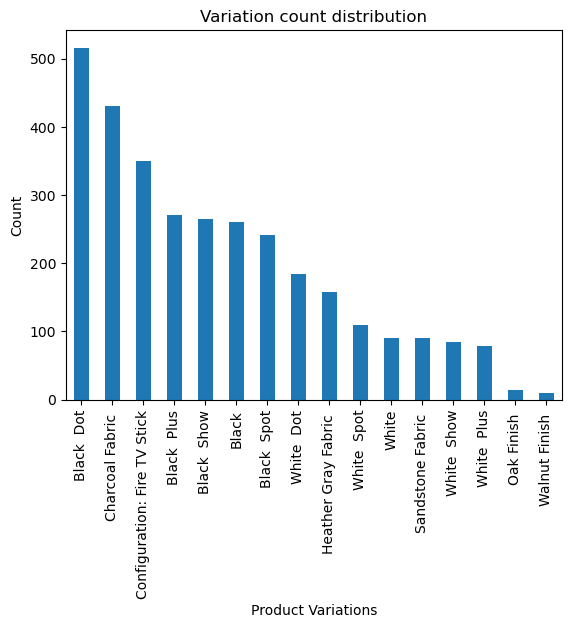

In [24]:
fig=data['variation'].value_counts().plot(kind='bar')
plt.title('Variation count distribution')
plt.xlabel('Product Variations')
plt.ylabel('Count')
plt.show()
  

In [25]:
print(f"perecentage of variation:\n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

perecentage of variation:
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [26]:
data['Length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: Length, dtype: float64

[Text(0.5, 1.0, 'Distribution of Length of review')]

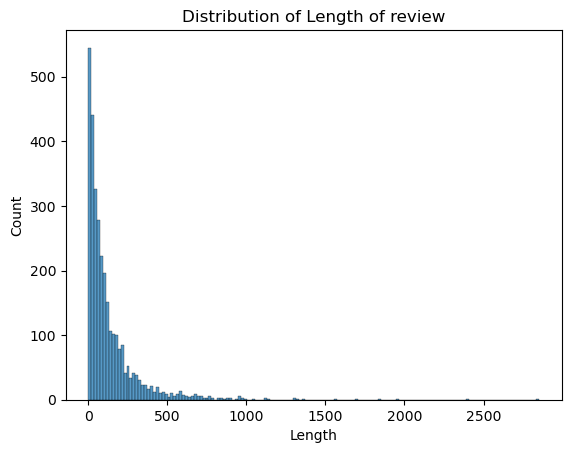

In [27]:
sns.histplot(data['Length']).set(title="Distribution of Length of review")

[Text(0.5, 1.0, 'Distribution of length of review if feedback=0')]

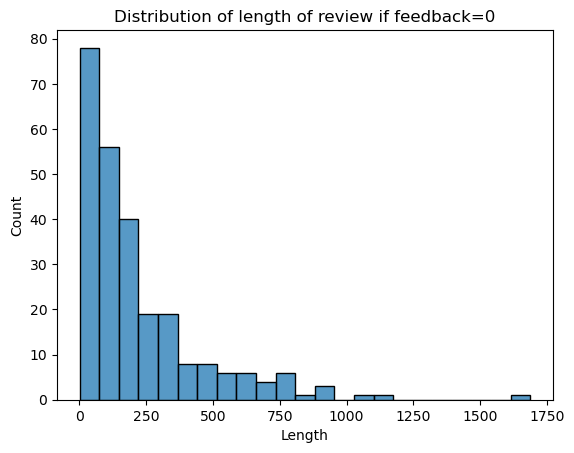

In [28]:
sns.histplot(data[data['feedback']==0]['Length']).set(title="Distribution of length of review if feedback=0")

[Text(0.5, 1.0, 'Distribution of length of review if feedback=1')]

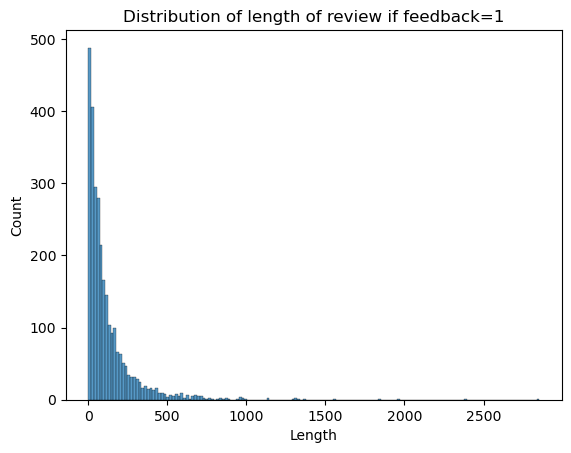

In [29]:
sns.histplot(data[data['feedback']==1]['Length']).set(title="Distribution of length of review if feedback=1")

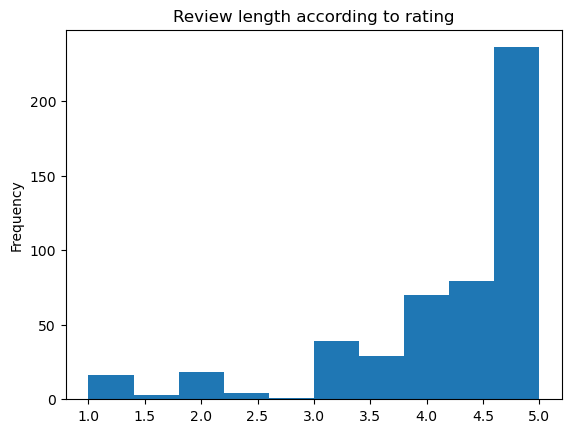

In [30]:
data.groupby('Length')['rating'].mean().plot.hist()
plt.title('Review length according to rating')
plt.show()

In [31]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

In [33]:
from wordcloud import WordCloud

In [34]:
#combine all reviews
reviews = "".join([review for review in data['verified_reviews']])
reviews

'Love my Echo!Loved it!"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.""I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."Music"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.""Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet."I think this is the 5th one I\'ve purchased. I\'m working on

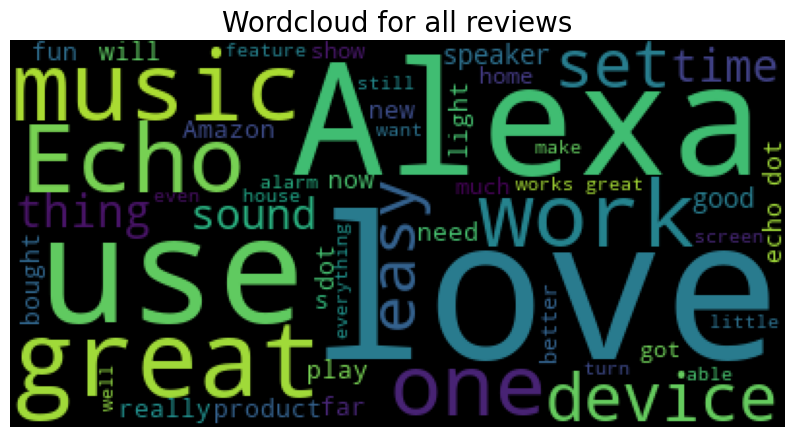

In [35]:
wc=WordCloud(background_color='black',max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=20)
plt.axis('off')
plt.show()

In [36]:
neg_review="".join(review for review in data[data['feedback']==0]['verified_reviews'])
pos_review="".join(review for review in data[data['feedback']==1]['verified_reviews'])

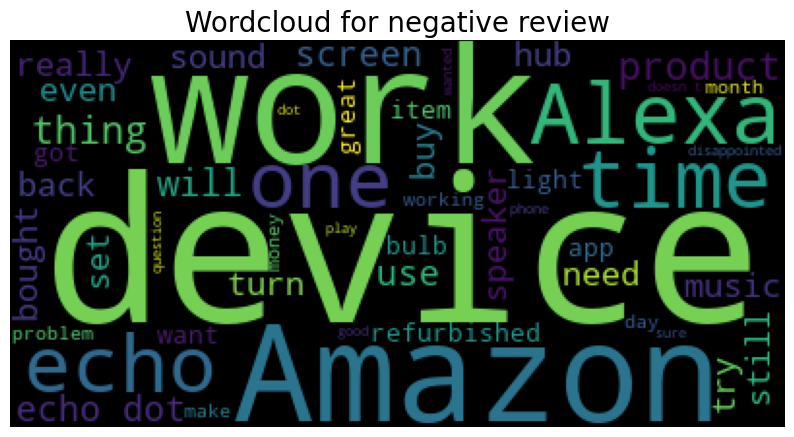

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(neg_review))
plt.title('Wordcloud for negative review',fontsize=20)
plt.axis('off')
plt.show()

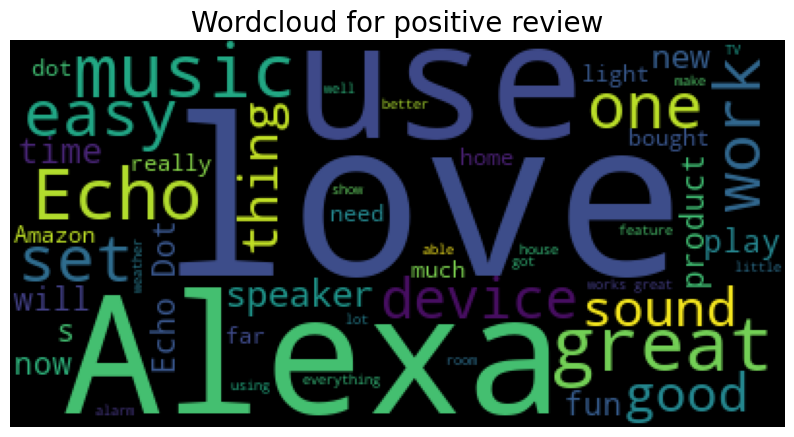

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(pos_review))
plt.title('Wordcloud for positive review',fontsize=20)
plt.axis('off')
plt.show()

In [83]:
from nltk.stem.porter import PorterStemmer
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [50]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [51]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [54]:
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [20,30,40,50,60,70,80,90, 100, 200],
              'max_depth': [4,6,8,9,10,15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2'],
              'criterion': ['gini', 'entropy','log_loss'] }


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [62]:
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=20,
                       random_state=42)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [65]:
y_hat_train = best_model.predict(X_train)

In [66]:
confusion_matrix(y_train, y_hat_train)

array([[  61,  121],
       [   0, 2023]], dtype=int64)

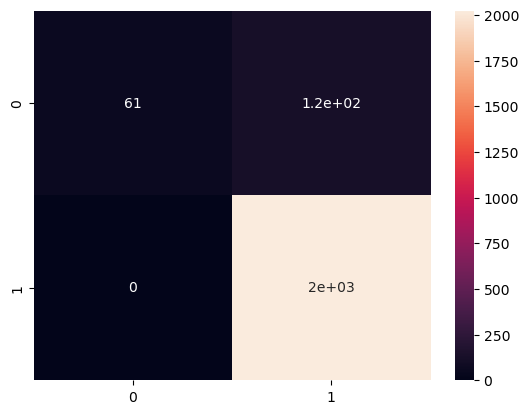

In [68]:
cm = confusion_matrix(y_train, y_hat_train)
sns.heatmap(cm, annot=True)
plt.show()

In [70]:
y_hat_test = best_model.predict(X_test)

In [71]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        75
           1       0.92      1.00      0.96       870

    accuracy                           0.92       945
   macro avg       0.96      0.53      0.53       945
weighted avg       0.93      0.92      0.89       945



In [58]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [59]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [72]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9386243386243386


XgBoost

In [75]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


In [77]:
y_preds = model_xgb.predict(X_test)

In [78]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 25  50]
 [ 10 860]]


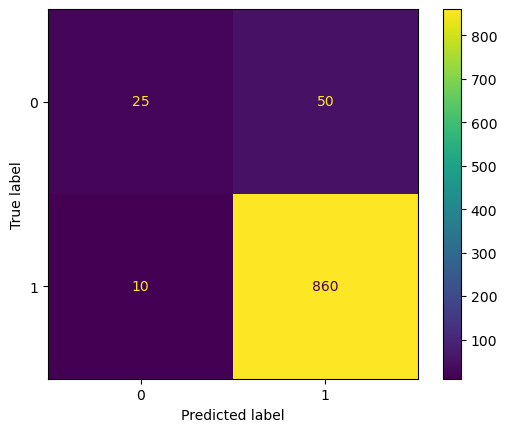

In [81]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [84]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [85]:
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9132275132275133


In [87]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 25  50]
 [ 10 860]]


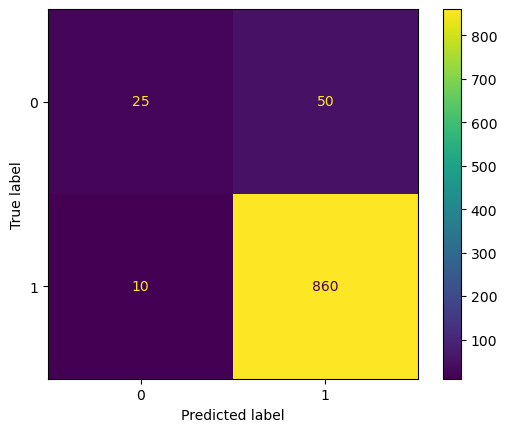

In [88]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

XgBoost is the model that giving maximum accuracy so we selecting xgboost

In [89]:
from pickle import dump

In [91]:
dump(model_xgb,open('clmsf.pkl','wb'))